In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name,size=8)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic',size=8)
#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 발전전력량, 설비량 데이터 불러오기
electric21 = pd.read_csv('data/2021발전전력량추이.csv')
generate21 = pd.read_csv('data/2021발전설비추이.csv')

In [3]:
# 'Unnamed: 0' 컬럼 삭제
electric21.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
generate21.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
electric21.head(2)

,날짜,원자력,석 탄,가 스,신재생,유 류,양 수,기 타
0,2021-01,"14,042","17,800","17,339","3,149",301,324,201
1,2021-02,"12,732","14,460","13,769","3,367",148,308,189


In [5]:
electric21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      12 non-null     object
 1   원자력     12 non-null     object
 2   석  탄    12 non-null     object
 3   가  스    12 non-null     object
 4   신재생     12 non-null     object
 5   유  류    12 non-null     int64 
 6   양  수    12 non-null     int64 
 7   기  타    12 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 896.0+ bytes


In [6]:
electric21['원자력'] = electric21['원자력'].replace(',','',regex=True).astype('int64')
electric21['석  탄'] = electric21['석  탄'].replace(',','',regex=True).astype('int64')
electric21['가  스'] = electric21['가  스'].replace(',','',regex=True).astype('int64')
electric21['신재생'] = electric21['신재생'].replace(',','',regex=True).astype('int64')

In [7]:
generate21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      12 non-null     object
 1   원자력     12 non-null     object
 2   석  탄    12 non-null     object
 3   가  스    12 non-null     object
 4   신재생     12 non-null     object
 5   유  류    12 non-null     object
 6   양  수    12 non-null     object
 7   기  타    12 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 896.0+ bytes


In [8]:
generate21['원자력'] = generate21['원자력'].replace(',','',regex=True).astype('int64')
generate21['석  탄'] = generate21['석  탄'].replace(',','',regex=True).astype('int64')
generate21['가  스'] = generate21['가  스'].replace(',','',regex=True).astype('int64')
generate21['신재생'] = generate21['신재생'].replace(',','',regex=True).astype('int64')
generate21['유  류'] = generate21['유  류'].replace(',','',regex=True).astype('int64')
generate21['양  수'] = generate21['양  수'].replace(',','',regex=True).astype('int64')

---

In [9]:
# 데이터 기초통계량 확인
electric21.describe()

,원자력,석 탄,가 스,신재생,유 류,양 수,기 타
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,13167.916667,16497.333333,14031.500000,3612.000000,196.333333,306.916667,255.666667
std,1307.001527,2713.050927,1493.445893,311.530533,75.285316,24.817363,50.985441
min,11314.000000,12862.000000,12192.000000,3149.000000,107.000000,256.000000,189.000000
25%,12489.000000,14498.250000,13140.750000,3469.750000,140.000000,294.250000,220.250000
50%,12770.000000,16298.000000,13610.500000,3573.500000,164.000000,308.500000,243.500000
75%,13625.250000,17900.250000,14708.000000,3739.000000,250.000000,320.250000,290.250000
max,16532.000000,21387.000000,17339.000000,4195.000000,339.000000,344.000000,359.000000


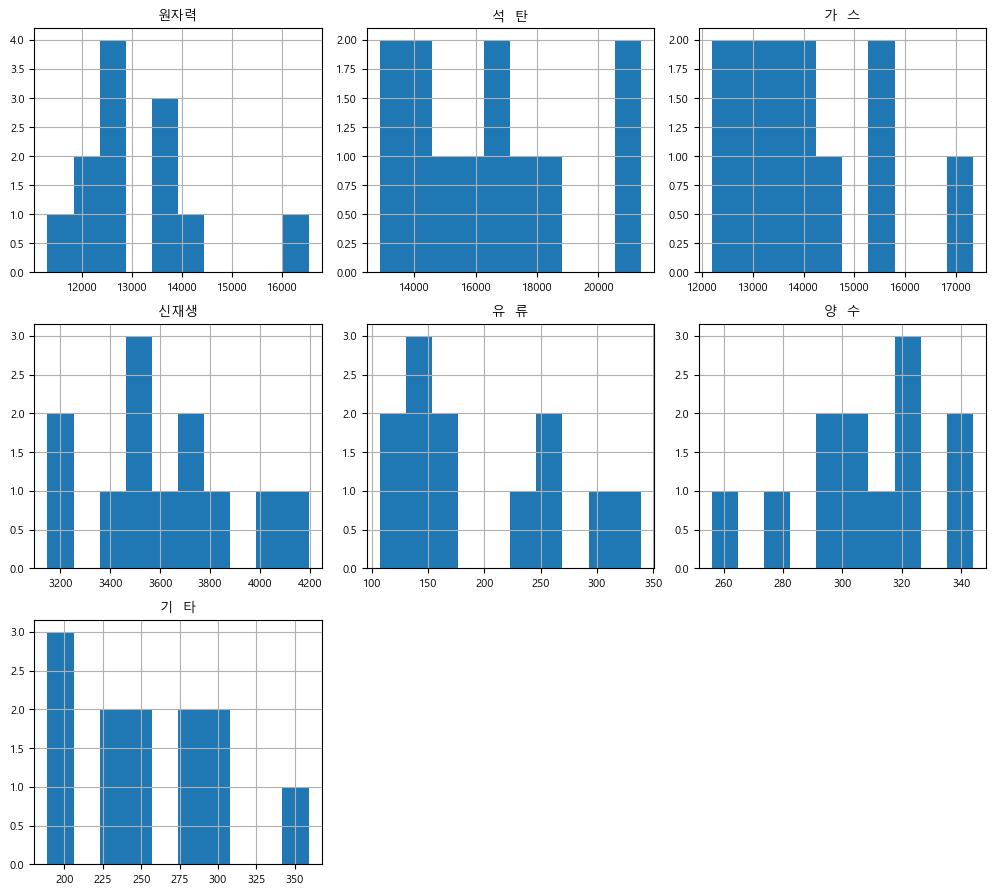

In [10]:
# 데이터 시각화
electric21.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [11]:
electric21.head(2)

,날짜,원자력,석 탄,가 스,신재생,유 류,양 수,기 타
0,2021-01,14042,17800,17339,3149,301,324,201
1,2021-02,12732,14460,13769,3367,148,308,189


In [12]:
electric21['날짜']

0     2021-01
1     2021-02
2     2021-03
3     2021-04
4     2021-05
5     2021-06
6     2021-07
7     2021-08
8     2021-09
9     2021-10
10    2021-11
11    2021-12
Name: 날짜, dtype: object

In [13]:
electric21 = electric21.set_index('날짜')
electric21.head(2)

,원자력,석 탄,가 스,신재생,유 류,양 수,기 타
날짜,,,,,,,
2021-01,14042,17800,17339,3149,301,324,201
2021-02,12732,14460,13769,3367,148,308,189


In [14]:
generate21 = generate21.set_index('날짜')
generate21.head(2)

,원자력,석 탄,가 스,신재생,유 류,양 수,기 타
날짜,,,,,,,
2021-01,23250,35853,41170,21491,2159,4700,197
2021-02,23250,35853,41170,21785,2159,4700,197


<AxesSubplot: xlabel='날짜'>

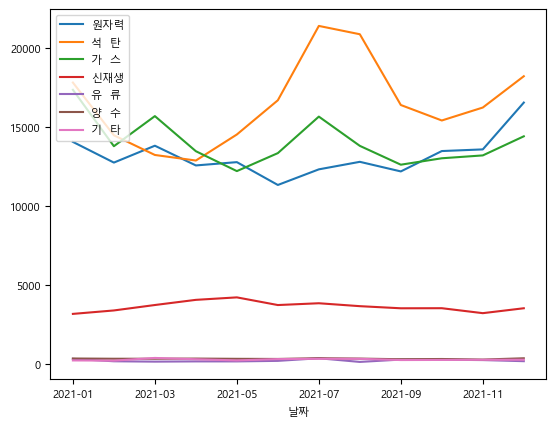

In [15]:
electric21.plot()

<AxesSubplot: xlabel='날짜'>

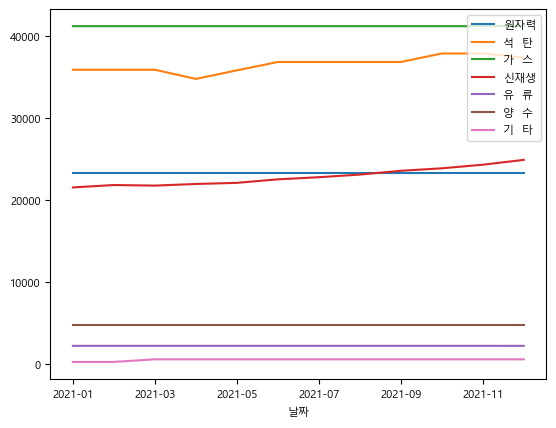

In [16]:
generate21.plot()

In [17]:
generate21.columns

Index(['원자력', '석  탄', '가  스', '신재생', '유  류', '양  수', '기  타'], dtype='object')

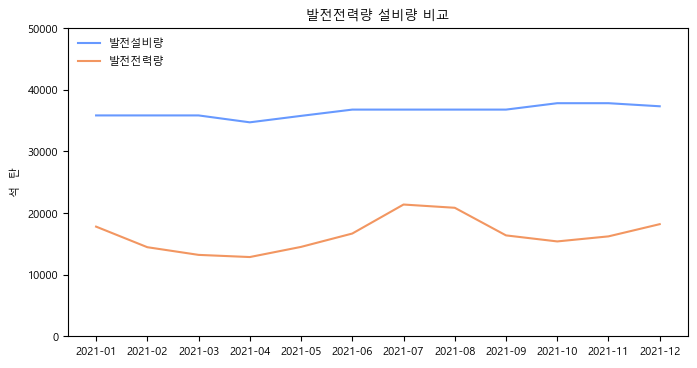

In [18]:
# 2017, 2021 비교
plt.rcParams['axes.unicode_minus'] = 'False'
generate21 = generate21['석  탄']
electric21 = electric21['석  탄']

fig = plt.figure(figsize=(8,4))

plt.plot(generate21, label='발전설비량', color='#6799FF', linestyle='-')
plt.plot(electric21, label='발전전력량', color ='#F29661', linestyle='-')
plt.ylim(0,50000)
plt.title('발전전력량 설비량 비교')
plt.ylabel('석  탄')
plt.legend(loc='upper left',frameon=False)

plt.show()

In [19]:
# x = np.arange(2021.01, 2021.12)
# y1 = electric21['석  탄']
# y2 = generate21['석  탄']

# fig, ax1 = plt.subplots()

# #발전전력량, 설비량
# ax1.plot(x, y1, '-', color='green', markersize=7, linewidth=3, alpha=0.7, label='발전전력량')
# ax1.set_ylim(0,18)
# ax1.set_xlabel('month')
# ax1.set_ylabel('발전전력량')
# ax1.tick_params(axis='both', direction='in')

# ax2 = ax1.twinx()
# ax2.bar(x, y2, color='deeppink', label='발전설비량', alpha=0.7, width=0.7)
# ax2.set_ylim(0,18)
# ax2.set_ylabel('발전설비량')
# ax2.tick_params(axis='y', direction='in')

# ax1.set_zorder(ax2.get_zorder() + 10)
# ax1.patch.set_visible(False)

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.show()